# Sentiment Analysis

## Objective

To do Sentiment Analysis, with the relatively popular imdb dataset.

In this notebook, we will build a basic model to classify text into positive and negative sentiment classificiations.

#### About the data set:

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. 

You can find the dataset at [Kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews), [Stanford repo.](https://ai.stanford.edu/~amaas/data/sentiment/)

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#PARAMETERS
vocab_size= 10000
max_len = 250
embd_dim = 15

#### Loading the dataset

In [3]:
from tensorflow.keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [4]:
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

#### Building the model

In [6]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=15, batch_size=512, validation_split=0.2, verbose=1)

Epoch 1/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5444 - loss: 0.6910 - val_accuracy: 0.6876 - val_loss: 0.6780
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6499 - loss: 0.6712 - val_accuracy: 0.7514 - val_loss: 0.6391
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7442 - loss: 0.6259 - val_accuracy: 0.7738 - val_loss: 0.5727
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7972 - loss: 0.5532 - val_accuracy: 0.8114 - val_loss: 0.4959
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8270 - loss: 0.4751 - val_accuracy: 0.8190 - val_loss: 0.4367
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8339 - loss: 0.4153 - val_accuracy: 0.8498 - val_loss: 0.3909
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8628 - loss: 0.3670 - val_accuracy: 0.8528 - val_loss: 0.3669
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8694 - loss: 0.3404 - val_accuracy: 0.8622 - v

#### Model Evaluation

In [8]:
results = model.evaluate(x_test, y_test, verbose=False)
print(f"Test loss : {results[0]:.4f} \nTest Accuracy:  {results[1]:.4f}")

Test loss : 0.2959 
Test Accuracy:  0.8763


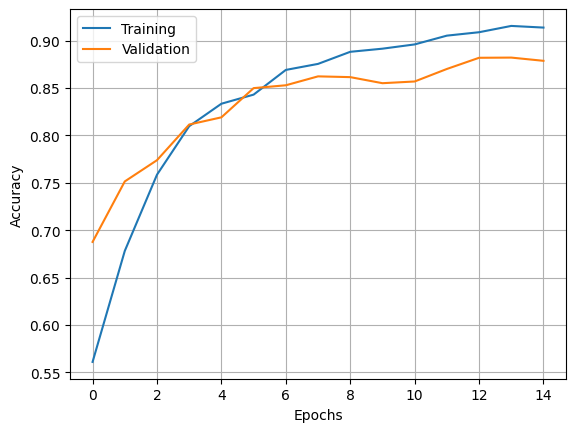

In [9]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#### Classifying our own reviews

In [10]:
word_index = imdb.get_word_index()
word_index = {k : (v+3) for k, v in word_index.items()}

In [11]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def encode_review(text):
    tokens = text.lower().split()
    encoded = [1]
    for word in tokens:
        if word in word_index:
            encoded.append(word_index[word])
        else:
            encoded.append(2)
    return encoded

In [12]:
def predict_sentiment():
    review = str(input("Enter your review: "))
    encoded_review = encode_review(review)
    padded_review = pad_sequences([encoded_review], value=0, padding='post', maxlen=max_len)
    
    prediction = model.predict(padded_review)
    
    print(f'Prediction: {prediction[0][0]}')
    print('Sentiment:', 'Positive' if prediction[0][0] > 0.5 else 'Negative')

In [13]:
predict_sentiment()

Enter your review:  This movie is utter nonsense, i cannot believe I wasted my money on this absolute stinker of a film. The script was stale and boring, the actors were subpar, this needs improvement!.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediction: 0.19492556154727936
Sentiment: Negative


In [14]:
predict_sentiment()

Enter your review:  The movie is opens with a great scene, and it continues to pull us inside the story and kept us lockedin, truly a great crime thriller.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Prediction: 0.947913408279419
Sentiment: Positive


### Conclusion

We were able to build a model which can predict the sentiment (binary) of the reviews with good accuracy, we can use the model for further review classification purposes.